In [1]:
!pip install yfinance

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
# Download Tesla stock data
ticker = 'TSLA'
data = yf.download(ticker, start='2019-01-01', end='2024-01-01')

# We only need Open, High, Low, Volume to predict Close
df = data[['Open', 'High', 'Low', 'Volume', 'Close']].copy()
print(df.head())

/tmp/ipython-input-1728903883.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2019-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed

Price            Open       High        Low     Volume      Close
Ticker           TSLA       TSLA       TSLA       TSLA       TSLA
Date                                                             
2019-01-02  20.406668  21.008667  19.920000  174879000  20.674667
2019-01-03  20.466667  20.626667  19.825333  104478000  20.024000
2019-01-04  20.400000  21.200001  20.181999  110911500  21.179333
2019-01-07  21.448000  22.449333  21.183332  113268000  22.330667
2019-01-08  22.797333  22.934000  21.801332  105127500  22.356667


In [3]:
# Create a 'Target' column: Tomorrow's Close Price
df['Target'] = df['Close'].shift(-1)

# The last row will have a NaN (empty) Target because we don't know the future yet!
# We must drop it so the model doesn't get confused.
df.dropna(inplace=True)

# Define Features (X) and Target (y)
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Target']

In [4]:
split = int(0.8 * len(df))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"Training on {len(X_train)} days, Testing on {len(X_test)} days.")

Training on 1005 days, Testing on 252 days.


In [5]:
# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# 2. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Evaluation
print(f"LR Mean Absolute Error: {mean_absolute_error(y_test, lr_preds):.2f}")
print(f"RF Mean Absolute Error: {mean_absolute_error(y_test, rf_preds):.2f}")

LR Mean Absolute Error: 5.78
RF Mean Absolute Error: 6.80


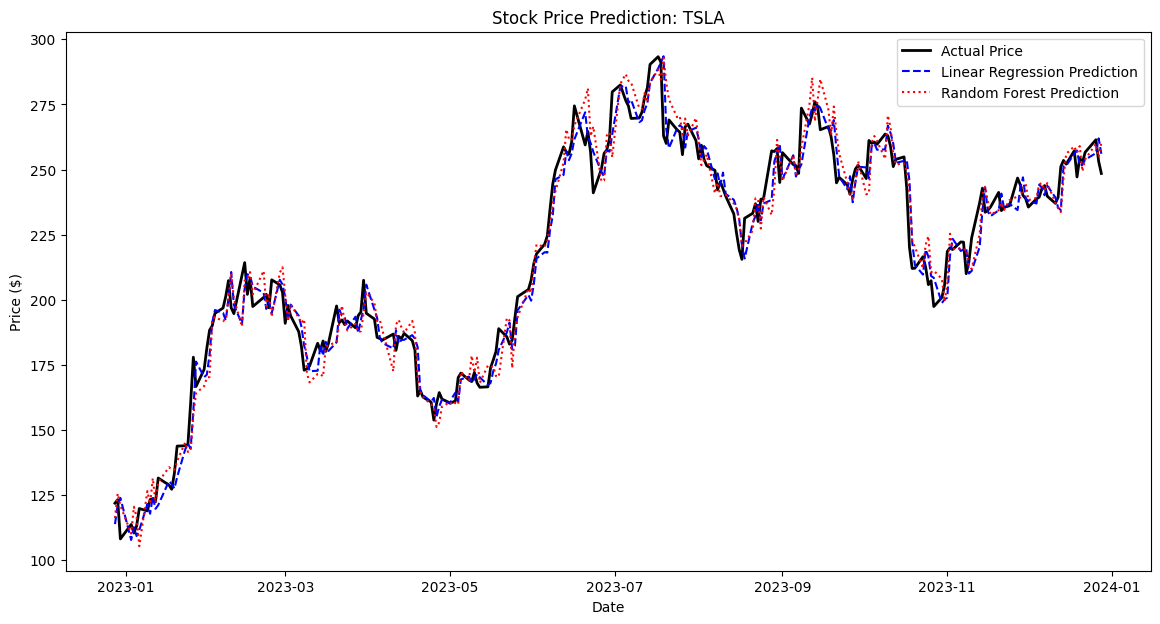

In [6]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual Price', color='black', linewidth=2)
plt.plot(y_test.index, lr_preds, label='Linear Regression Prediction', color='blue', linestyle='--')
plt.plot(y_test.index, rf_preds, label='Random Forest Prediction', color='red', linestyle=':')

plt.title(f'Stock Price Prediction: {ticker}')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate metrics for the Random Forest model
mae = mean_absolute_error(y_test, rf_preds)
r2 = r2_score(y_test, rf_preds)

print(f"Average Error (MAE): ${mae:.2f}")
print(f"Model Fit (R2 Score): {r2:.2%}")

Average Error (MAE): $6.80
Model Fit (R2 Score): 95.74%
